In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
c_card = pd.read_csv('data/fraud.csv')

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
c_card.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


# 컬럼 이름 변경

In [5]:
c_card.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
new_cols = []

for i in c_card.columns:
    if i.startswith('amt'):
        i = i.replace('amt', 'amount')
    new_cols.append(i)

In [7]:
c_card.columns = new_cols

In [8]:
c_card.head()

,trans_date_trans_time,cc_num,merchant,category,amount,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [9]:
c_card.isna().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amount                   0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [10]:
c_card.is_fraud == 0

0         True
1         True
2         True
3         True
4         True
          ... 
491129    True
491130    True
491131    True
491132    True
491133    True
Name: is_fraud, Length: 491134, dtype: bool

# 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거합니다.

In [11]:
columns_to_drop = ['cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']

In [12]:
c_cardd = c_card.drop(columns=columns_to_drop)

In [13]:
c_cardd

,trans_date_trans_time,category,amount,gender,is_fraud
0,2019-01-01 00:00:44,grocery_pos,107.23,F,0
1,2019-01-01 00:12:34,grocery_pos,44.71,M,0
2,2019-01-01 00:17:16,grocery_net,46.28,F,0
3,2019-01-01 00:20:15,grocery_pos,64.09,M,0
4,2019-01-01 00:23:41,misc_pos,25.58,F,0
...,...,...,...,...,...
491129,2020-12-31 23:56:48,home,134.26,F,0
491130,2020-12-31 23:56:57,shopping_pos,25.49,F,0
491131,2020-12-31 23:59:09,kids_pets,111.84,M,0
491132,2020-12-31 23:59:15,kids_pets,86.88,F,0


# Outlier

In [14]:
isf = c_cardd[c_cardd['is_fraud'] == 1]

In [15]:
print(isf)

       trans_date_trans_time       category   amount gender  is_fraud
4794     2019-01-12 00:59:01  gas_transport    11.73      M         1
4816     2019-01-12 03:48:07    grocery_pos   328.68      M         1
4979     2019-01-12 15:46:10    food_dining   120.58      M         1
5073     2019-01-12 19:53:59   shopping_net  1081.35      M         1
5124     2019-01-12 22:44:05   shopping_net   776.70      M         1
...                      ...            ...      ...    ...       ...
477832   2020-12-21 02:21:41    grocery_pos   358.24      F         1
477847   2020-12-21 02:36:03   shopping_net   859.12      F         1
479296   2020-12-21 22:38:38           home   209.84      F         1
479305   2020-12-21 22:42:11    food_dining   123.58      F         1
479341   2020-12-21 22:59:22           home   219.11      F         1

[1244 rows x 5 columns]


In [16]:
c_card.describe()

,cc_num,amount,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [17]:
c_card.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amount                   0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [18]:
c_card['amount'].sort_values()

258861        1.00
254027        1.00
469101        1.00
257652        1.00
172571        1.00
            ...   
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: amount, Length: 491134, dtype: float64

<AxesSubplot:ylabel='amount'>

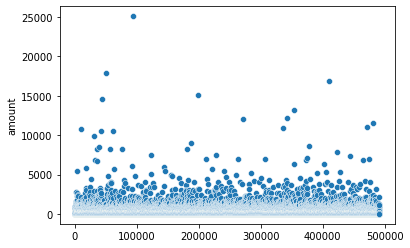

In [19]:
sns.scatterplot(x = c_card.index, y = c_card['amount'])

# 최소 2개 이상의 새로운 피처(변수)를 생성해봅시다.

In [20]:
c_cardd['trans_hour'] = pd.to_datetime(c_cardd['trans_date_trans_time']).dt.hour

In [21]:
c_cardd['amt_to_mean_ratio'] = c_cardd['amount'] / c_cardd['amount'].mean()

In [22]:
c_cardd

,trans_date_trans_time,category,amount,gender,is_fraud,trans_hour,amt_to_mean_ratio
0,2019-01-01 00:00:44,grocery_pos,107.23,F,0,0,1.552930
1,2019-01-01 00:12:34,grocery_pos,44.71,M,0,0,0.647501
2,2019-01-01 00:17:16,grocery_net,46.28,F,0,0,0.670238
3,2019-01-01 00:20:15,grocery_pos,64.09,M,0,0,0.928166
4,2019-01-01 00:23:41,misc_pos,25.58,F,0,0,0.370456
...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,home,134.26,F,0,23,1.944385
491130,2020-12-31 23:56:57,shopping_pos,25.49,F,0,23,0.369152
491131,2020-12-31 23:59:09,kids_pets,111.84,M,0,23,1.619693
491132,2020-12-31 23:59:15,kids_pets,86.88,F,0,23,1.258216


# 데이터의 위도/경도 정보를 활용

In [23]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [24]:
from geopy.distance import geodesic

c_card['distance_km'] = c_card.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)

In [29]:
c_card

,trans_date_trans_time,cc_num,merchant,category,amount,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,distance_km
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,30.216618
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,84.714605
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,67.768167
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,22.322745
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,79.398244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,98.043837
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,127.240424
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,100.023736
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,80.887812


# 통계적 관점으로 접근하여 유용한 변수를 만들기

In [26]:
#평균
mean_amount = c_card['amount'].mean()
median_amount = c_card['amount'].median()
std_amount = c_card['amount'].std()

In [27]:
#빈도수
category_counts = c_card['category'].value_counts()

print(category_counts)

shopping_pos      48345
gas_transport     46029
home              43340
grocery_pos       42722
kids_pets         40295
shopping_net      39179
food_dining       35980
personal_care     35513
entertainment     33619
misc_pos          32411
health_fitness    31415
misc_net          25179
grocery_net       24486
travel            12621
Name: category, dtype: int64


# 사기 거래 여부 예측

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

X = c_card.drop(['is_fraud'], axis=1)
y = c_card['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64']))

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9976890264387592

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     98006
           1       0.00      0.00      0.00       221

    accuracy                           1.00     98227
   macro avg       0.50      0.50      0.50     98227
weighted avg       1.00      1.00      1.00     98227



# 회고 :
    어려운것보다는 이것을 활용하여 머신러닝이든 뭐든 했으면 좋겠다.